Assignment 03 - Part B
Author: Vedang Sharma

Sample code from Labs 6 to 10 was heavily referenced while creating this project. In Part B, I chose to scrape data from FinViz, a popular finance website used by analysts and investors. Its structured tables make it ideal for web scraping. This project demonstrates how real market data can be collected and visualized using data analytics—something I hope to showcase to future employers.

In [6]:
import time
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service  # Import the Service class
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# In this cell I am trying to scrape the Data. I try to keep the code as simple as possible and had to google a few things because of driver issues

# Due to some issues with chrome browser and chrome driver versions, I researched and had to use Selenium's Service object to manage the driver automatically. 
service = Service()
browser = webdriver.Chrome(service=service)

browser.maximize_window()
# Trying to set realistic page timeout 
browser.set_page_load_timeout(45)

# In this case I use a try/finally block to make sure the browser always closes
try:
    # Go to the website
    print("Navigating to finviz.com...")
    browser.get("https://finviz.com/screener.ashx?v=111")
    print("Page loaded successfully.")
    time.sleep(1) # Short wait for elements to render after page load

    # Store results
    data = []

    # Loop through 3 pages
    print("\nStarting to scrape...")
    for page_start_row in [1, 21, 41]:
        url = f"https://finviz.com/screener.ashx?v=111&r={page_start_row}"
        print(f"Loading page: {url}")
        browser.get(url)
        time.sleep(4) # Give page time to load its data table

        rows = browser.find_elements(By.CSS_SELECTOR, "tr[valign='top']")
        print(f"Found {len(rows)} rows on page starting with row {page_start_row}.")

        for r in rows:
            html = r.get_attribute("innerHTML")
            soup = BeautifulSoup(html, "lxml")
            text = soup.get_text(separator="|").strip()
            parts = text.split("|")

            if len(parts) >= 10:
                ticker = parts[1]
                sector = parts[3]
                price_str = parts[8]
                try:
                    price = float(price_str.replace(",", ""))
                    data.append([ticker, sector, price])
                except ValueError:
                    continue

    print(f"\nScraping complete. Total rows saved: {len(data)}")

except Exception as e:
    print(f"\nAn error occurred: {e}")

finally:
    # Killing the browser in any case to prevent chrome from eating too much memory
    print("\nClosing the browser.")
    browser.quit()

Navigating to finviz.com...
Page loaded successfully.

Starting to scrape...
Loading page: https://finviz.com/screener.ashx?v=111&r=1
Found 20 rows on page starting with row 1.
Loading page: https://finviz.com/screener.ashx?v=111&r=21
Found 20 rows on page starting with row 21.
Loading page: https://finviz.com/screener.ashx?v=111&r=41
Found 20 rows on page starting with row 41.

Scraping complete. Total rows saved: 60

Closing the browser.


In [7]:
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=["Ticker", "Sector", "Price"])

    # Save to CSV
    df.to_csv("finviz_data.csv", index=False)

    # Read back and show first & last 3 rows
    df_read = pd.read_csv("finviz_data.csv")
    print("\nFirst 3 rows:")
    print(df_read.head(3))
    print("\nLast 3 rows:")
    print(df_read.tail(3))



First 3 rows:
  Ticker           Sector   Price
0      A       Healthcare  113.99
1     AA  Basic Materials   30.33
2    AAA        Financial   24.99

Last 3 rows:
   Ticker      Sector   Price
57   ABSI  Healthcare    3.12
58    ABT  Healthcare  123.67
59   ABTS   Financial    4.71


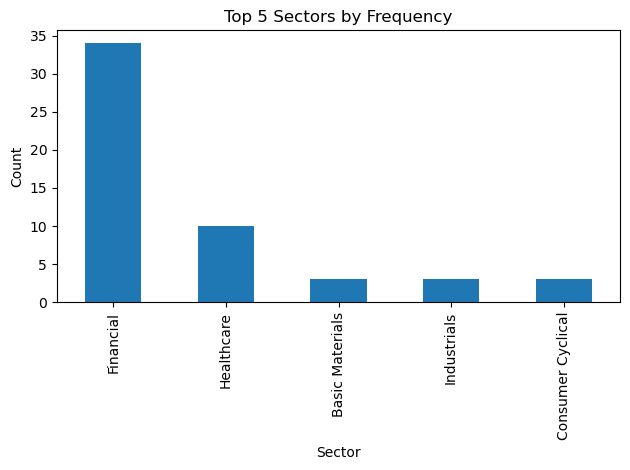

In [8]:
    # Plot sector distribution with the help of Matplotlib 
    top_sectors = df['Sector'].value_counts().head(5)
    top_sectors.plot(kind='bar', title='Top 5 Sectors by Frequency')
    plt.xlabel("Sector")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


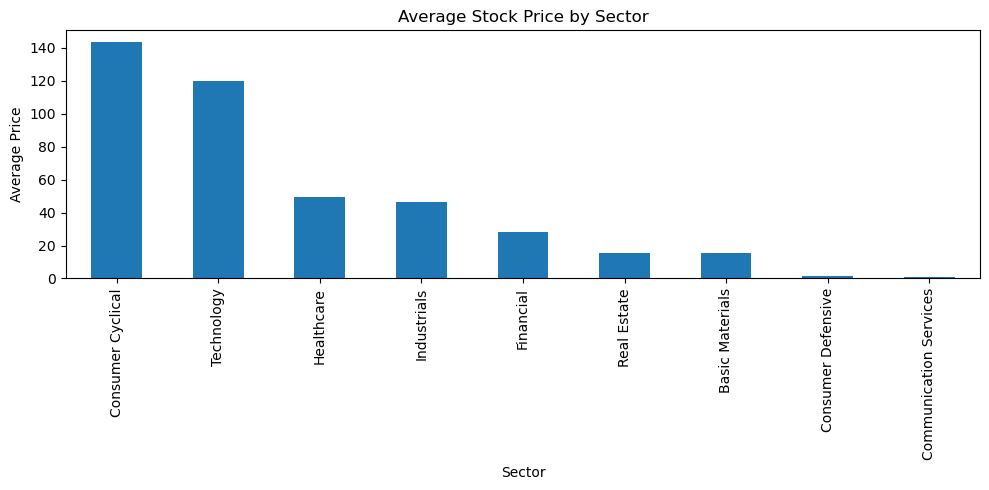

In [9]:
# Group by Sector and calculate average Price
avg_prices = df.groupby("Sector")["Price"].mean().sort_values(ascending=False)

# Plot the average prices
avg_prices.plot(kind="bar", title="Average Stock Price by Sector", figsize=(10,5))
plt.xlabel("Sector")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()
